In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.metrics import silhouette_score, silhouette_samples
import sklearn.metrics
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture

import itertools
import scipy

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import os
import seaborn as sns
os.chdir("P:\\Courses\\Kaggle\\Titanic\\Data")

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

# EDA

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


<AxesSubplot:>

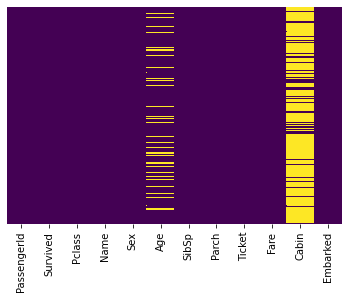

In [6]:
sns.heatmap(train.isnull(),yticklabels=False, cbar=False,cmap='viridis')

<AxesSubplot:xlabel='Survived', ylabel='count'>

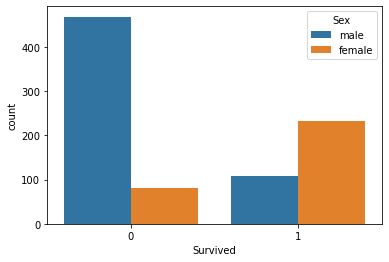

In [7]:
sns.countplot(x='Survived', data=train, hue='Sex')

In [11]:
train['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

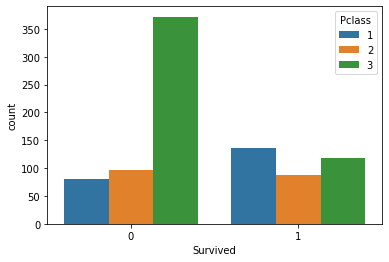

In [12]:
sns.countplot(x='Survived', data=train, hue='Pclass')

<AxesSubplot:xlabel='Age'>

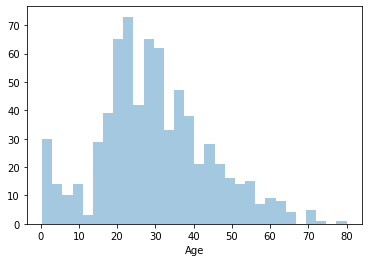

In [13]:
sns.distplot(train['Age'].dropna(), kde=False, bins=30)

<AxesSubplot:ylabel='Frequency'>

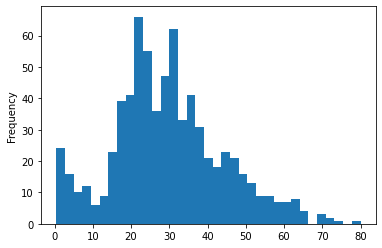

In [14]:
train['Age'].plot.hist(bins=35)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

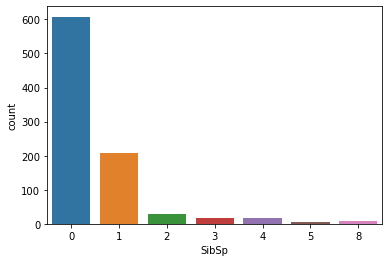

In [15]:
sns.countplot(x='SibSp', data=train)

<AxesSubplot:>

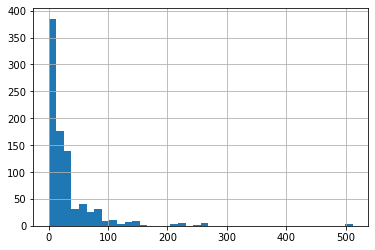

In [16]:
train['Fare'].hist(bins=40)

# Data Handling

In [17]:
def impute_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    
    if pd.isnull(Age):
        if Pclass==1: 
            return 37
        elif Pclass==2:
            return 29
        else:
            return 24
    else:
        return Age
        

In [18]:
train['Age']=train[['Age', 'Pclass']].apply(impute_age,axis=1)

In [19]:
train['Age']=np.log10(train['Age'])

In [20]:
train['Fare']=np.log10(train['Fare']+10)

<AxesSubplot:>

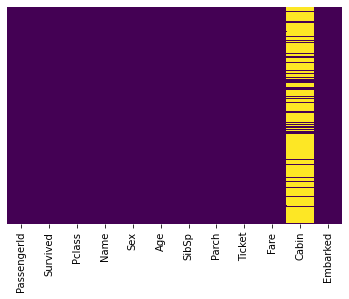

In [21]:
sns.heatmap(train.isnull(),yticklabels=False, cbar=False, cmap='viridis')

In [22]:
train.drop(['Cabin'],axis=1,inplace=True)

In [24]:
train.dropna(inplace=True)

<AxesSubplot:>

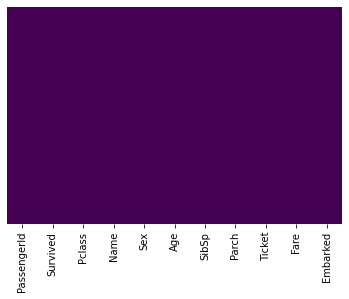

In [25]:
sns.heatmap(train.isnull(),yticklabels=False, cbar=False, cmap='viridis')

# Dummy Creation

In [26]:
dums=pd.get_dummies(train[['Sex', 'Embarked']], drop_first=True)

In [27]:
train=pd.concat([train,dums], axis=1)

In [28]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,1.342423,1,0,A/5 21171,1.236789,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1.579784,1,0,PC 17599,1.910001,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,1.414973,0,0,STON/O2. 3101282,1.253459,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1.544068,1,0,113803,1.800029,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,1.544068,0,0,373450,1.256477,S,1,0,1


In [29]:
train.drop(['Sex', 'Embarked','Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)

In [30]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,1.342423,1,0,1.236789,1,0,1
1,1,1,1.579784,1,0,1.910001,0,0,0
2,1,3,1.414973,0,0,1.253459,0,0,1
3,1,1,1.544068,1,0,1.800029,0,0,1
4,0,3,1.544068,0,0,1.256477,1,0,1


([<matplotlib.axis.XTick at 0x20f4528afc8>,
 [Text(0, 1, 'Survived'),
  Text(1, 1, 'Pclass'),
  Text(2, 1, 'Age'),
  Text(3, 1, 'SibSp'),
  Text(4, 1, 'Parch'),
  Text(5, 1, 'Fare'),
  Text(6, 1, 'Sex_male'),
  Text(7, 1, 'Embarked_Q'),
  Text(8, 1, 'Embarked_S')])

([<matplotlib.axis.YTick at 0x20f4531e1c8>,
 [Text(0, 0, 'Survived'),
  Text(0, 1, 'Pclass'),
  Text(0, 2, 'Age'),
  Text(0, 3, 'SibSp'),
  Text(0, 4, 'Parch'),
  Text(0, 5, 'Fare'),
  Text(0, 6, 'Sex_male'),
  Text(0, 7, 'Embarked_Q'),
  Text(0, 8, 'Embarked_S')])

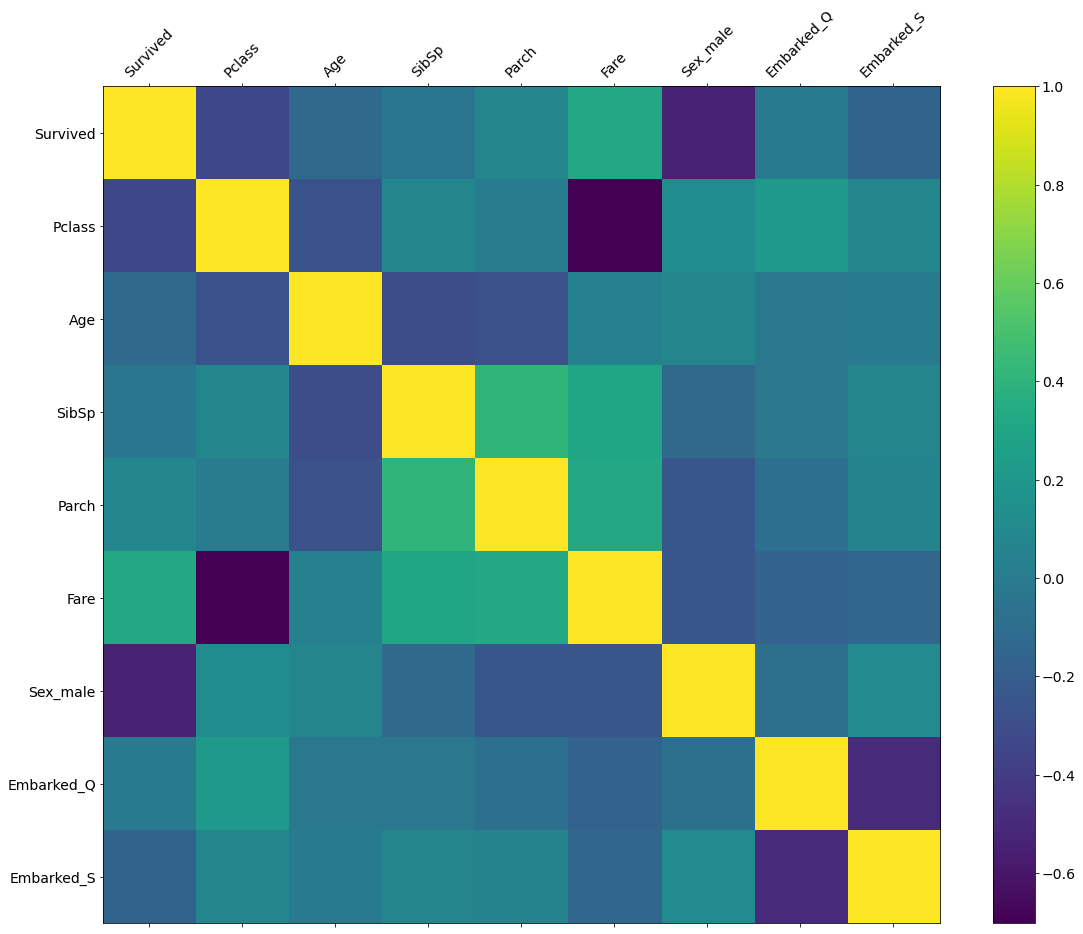

In [31]:
f = plt.figure(figsize=(19, 15))
plt.matshow(train.corr(), fignum=f.number)
plt.xticks(range(train.shape[1]), train.columns, fontsize=14, rotation=45)
plt.yticks(range(train.shape[1]), train.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)

# MODEL DEVELOPMENT

In [65]:
X=train.drop(['Survived'], axis=1)
Y=train['Survived']

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.3,random_state=176)

# Decision Tree


In [68]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=42, criterion="entropy",
                             min_samples_split=10, min_samples_leaf=10, max_depth=3, max_leaf_nodes=5)
clf.fit(X_train, Y_train)

y_pred_dt = clf.predict(X_test)

DecisionTreeClassifier(criterion='entropy', max_depth=3, max_leaf_nodes=5,
                       min_samples_leaf=10, min_samples_split=10,
                       random_state=42)

In [69]:
feature_names = X.columns
class_names = [str(x) for x in clf.classes_]

In [70]:
print(clf.tree_.node_count)
print(clf.tree_.impurity)
print(clf.tree_.children_left)
print(clf.tree_.threshold)

9
[0.94411504 0.8292743  0.6443001  0.33299131 0.99971144 0.44189874
 0.85579773 0.97886985 0.65002242]
[ 1  3  5 -1  7 -1 -1 -1 -1]
[ 0.5         2.5         1.40093142 -2.          1.52168822 -2.
 -2.         -2.         -2.        ]


In [71]:
from sklearn.metrics import confusion_matrix

confusion_matrix(Y_test, y_pred_dt)

array([[136,  16],
       [ 43,  72]], dtype=int64)

In [72]:
from sklearn.metrics import classification_report

In [73]:

print(classification_report(Y_test, y_pred_dt, target_names=class_names))

              precision    recall  f1-score   support

           0       0.76      0.89      0.82       152
           1       0.82      0.63      0.71       115

    accuracy                           0.78       267
   macro avg       0.79      0.76      0.77       267
weighted avg       0.78      0.78      0.77       267



In [34]:
from sklearn.metrics import confusion_matrix

In [35]:
confusion_matrix(Y_test,predictions)

array([[131,  21],
       [ 39,  76]], dtype=int64)

In [74]:
from sklearn.metrics import accuracy_score, cohen_kappa_score, f1_score, log_loss, roc_curve, auc

print("Accuracy = {:.2f}".format(accuracy_score(Y_test, y_pred_dt)))
print("Kappa = {:.2f}".format(cohen_kappa_score(Y_test, y_pred_dt)))
print("F1 Score = {:.2f}".format(f1_score(Y_test, y_pred_dt)))
print("Log Loss = {:.2f}".format(log_loss(Y_test, y_pred_dt)))

Accuracy = 0.78
Kappa = 0.54
F1 Score = 0.71
Log Loss = 7.63


In [75]:
def plot_roc(clf, X_test, y_test, name, ax, show_thresholds=True):
    y_pred_rf = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, thr = roc_curve(y_test, y_pred_rf)

    ax.plot([0, 1], [0, 1], 'k--');
    ax.plot(fpr, tpr, label='{}, AUC={:.2f}'.format(name, auc(fpr, tpr)));
    ax.scatter(fpr, tpr);

    if show_thresholds:
        for i, th in enumerate(thr):
            ax.text(x=fpr[i], y=tpr[i], s="{:.2f}".format(th), fontsize=14, 
                     horizontalalignment='left', verticalalignment='top', color='black',
                     bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.1', alpha=0.1));
        
    ax.set_xlabel('False positive rate', fontsize=18);
    ax.set_ylabel('True positive rate', fontsize=18);
    ax.tick_params(axis='both', which='major', labelsize=18);
    ax.grid(True);
    ax.set_title('ROC Curve', fontsize=18)

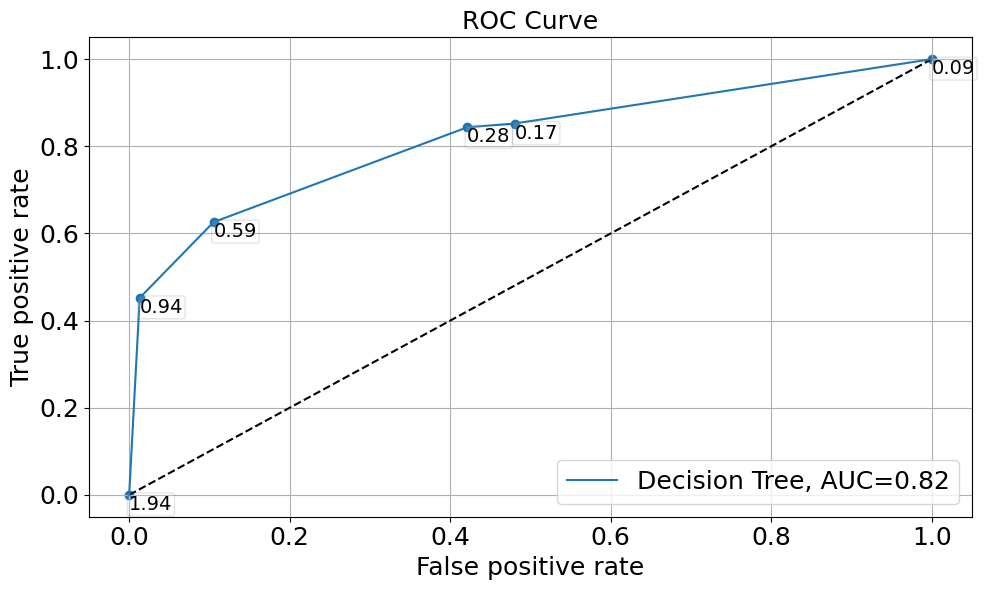

In [76]:
plt.style.use('default');
figure = plt.figure(figsize=(10, 6));    
ax = plt.subplot(1, 1, 1);
plot_roc(clf, X_test, Y_test, "Decision Tree", ax)
plt.legend(loc='lower right', fontsize=18);
plt.tight_layout();

# TEST DATA PREP

In [77]:
test['Age']=test[['Age', 'Pclass']].apply(impute_age,axis=1)

In [78]:
test['Age']=np.log10(test['Age'])

In [79]:
test['Fare']=np.log10(test['Fare']+10)

<AxesSubplot:>

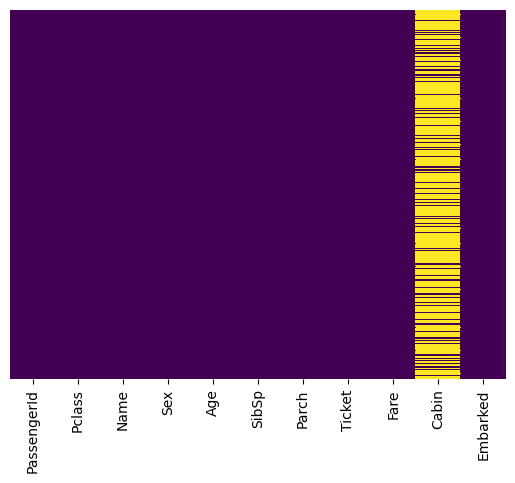

In [80]:
sns.heatmap(test.isnull(),yticklabels=False, cbar=False, cmap='viridis')

In [81]:
test.drop(['Cabin'],axis=1,inplace=True)

In [82]:
test['Fare'] = test['Fare'].fillna(test['Fare'].median())

<AxesSubplot:>

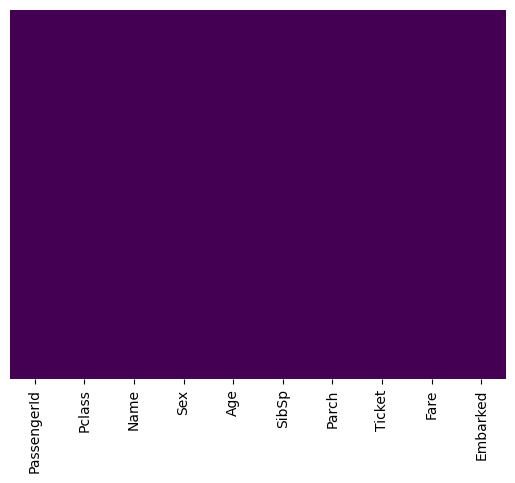

In [83]:
sns.heatmap(test.isnull(),yticklabels=False, cbar=False, cmap='viridis')

In [84]:
dumst=pd.get_dummies(test[['Sex', 'Embarked']], drop_first=True)

In [85]:
test=pd.concat([test,dumst], axis=1)

In [86]:
test.drop(['Sex', 'Embarked','Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)

In [87]:
test.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,1.537819,0,0,1.251132,1,1,0
1,3,1.672098,1,0,1.230449,0,0,1
2,2,1.792392,0,0,1.294191,1,1,0
3,3,1.431364,0,0,1.270970,1,0,1
4,3,1.342423,1,1,1.348061,0,0,1


# PREDICTIONS ON SAMPLE DATA - DT

In [88]:
predictions1=clf.predict(test)

In [89]:
predictions1

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [64]:
dataset1 = pd.DataFrame(predictions1)

In [65]:
dataset1.to_csv("DT1.csv")